In [1]:
# PREDICTION USING SUPERVISED ML
# To predict the percentage of marks of an student based on the number of study hours

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data from link
my_data = pd.read_csv("http://bit.ly/w-data")
print("data imported successfully")                    

data imported successfully


In [4]:
# This step is to print the information in the file
my_data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# This step is to print the information or data up to 5 columns
my_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# This step is to print the information or data of 5 columns from last
my_data.tail() 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
my_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
count = my_data.groupby(['Hours','Scores'])['Hours'].count()
count

Hours  Scores
1.1    17        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.5    41        1
4.8    54        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
8.9    95        1
9.2    88        1
Name: Hours, dtype: int64

In [9]:
print(my_data.shape)
print(" ")
print(my_data.columns)
print(" ")
print(my_data.nunique())
print(" ")
print(my_data.isnull().sum())

(25, 2)
 
Index(['Hours', 'Scores'], dtype='object')
 
Hours     23
Scores    23
dtype: int64
 
Hours     0
Scores    0
dtype: int64


In [10]:
# GRAPHS IN DIFFERENT STYLES 

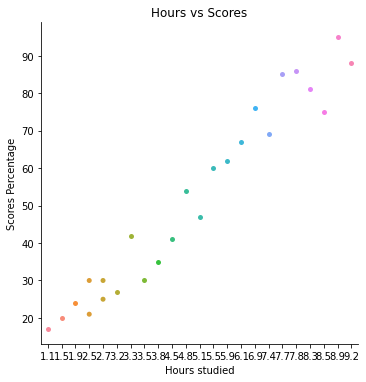

In [11]:
# GRAPH 1
sns.catplot(data = my_data,kind = 'swarm', x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores Percentage')
plt.show()

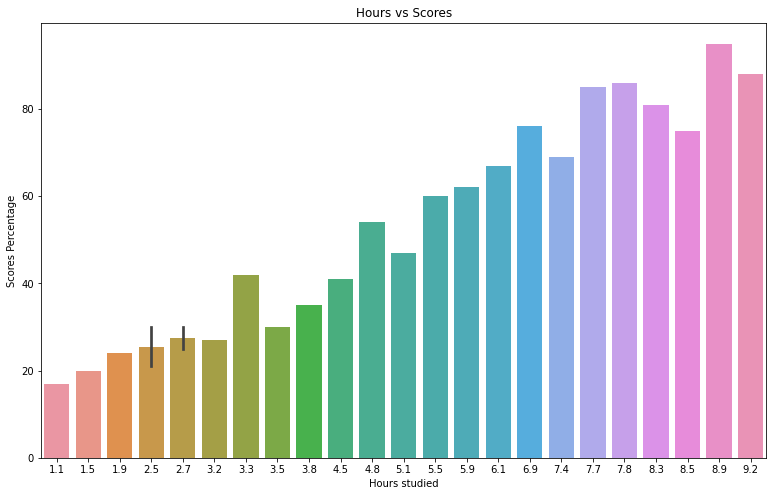

In [12]:
# GRAPH 2
plt.figure(figsize = (13,8))
sns.barplot(data = my_data, x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores Percentage')
plt.show()

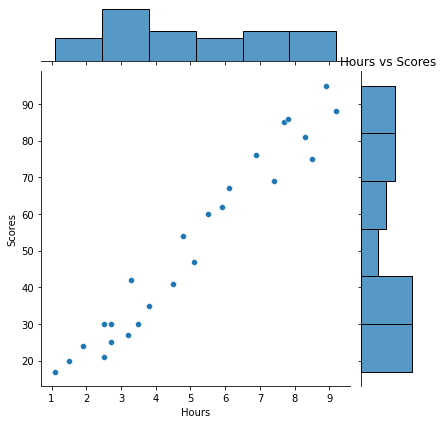

In [13]:
# GRAPH 3
sns.jointplot(data = my_data, x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores Percentage')
plt.show()

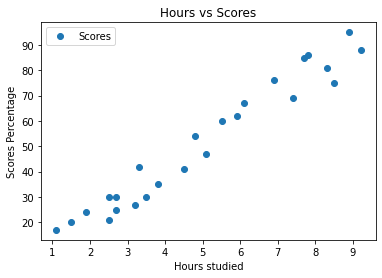

In [14]:
# GRAPH 4
my_data.plot(style = 'o', x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores Percentage')
plt.show()

In [15]:
# This step divides the data into attributes (inputs) and labels(outputs)
X = my_data.iloc[:, :-1].values
X = my_data[['Hours']].values
y = my_data.iloc[:, -1].values
print(X)
print(" ")
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
 
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [16]:
# This step is to split the data into training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [17]:
# Training the algorithm
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete")

Training complete


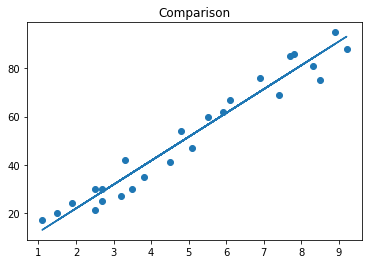

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X, line)
plt.title("Comparison")
plt.show()

In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Making Prediction
y_pred = regressor.predict(X_test)

In [21]:
# Comparing Actual vs Prediction
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
score_pred = np.array([8])
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
print("No of hours={}".format(8))
print("Predicted Score={}".format(predict[0]))

No of hours=8
Predicted Score=81.30341188657258


In [23]:
# Evaluating the model
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
